In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Goal of this exercise was to analyze multiple probability distributions,
# that can be used as priors for Bayesian inference
# and to get a feel of parameters for certain popular distributions

In [54]:
# 1. Normal distribution.

In [69]:
# 'loc' - mean
# 'scale' - standard deviation (the square root of the variance)

samples = {
    "m1v1":np.random.normal(loc=1,scale=1,size=10000),
    "m3v1":np.random.normal(loc=3,scale=1,size=10000),
    "m3v3":np.random.normal(loc=3,scale=3,size=10000),
    "m3v5":np.random.normal(loc=3,scale=5,size=10000)

}

print(samples)

df = pd.DataFrame(data=samples)
df_melt = pd.melt(df,var_name='parameters',value_name='Value')

{'m1v1': array([0.2340835 , 1.09785283, 1.23573451, ..., 1.87462624, 0.69253854,
       1.10378907]), 'm3v1': array([2.37798701, 2.89090907, 2.03644958, ..., 3.16903434, 4.05566608,
       2.38911044]), 'm3v3': array([ 3.7137878 ,  2.53350832,  3.24586452, ..., -2.12101658,
        4.80613357,  2.92950838]), 'm3v5': array([10.91511909,  6.38147682,  3.4715824 , ..., 10.22440932,
        3.61620969, 10.64730375])}


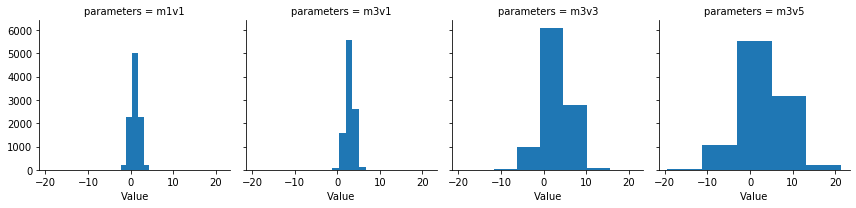

In [70]:
g = sns.FacetGrid(df_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=5,cumulative=False)

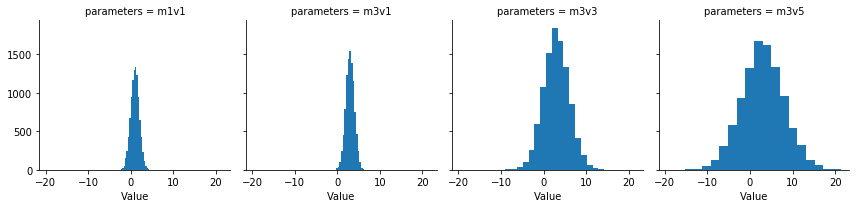

In [71]:
g = sns.FacetGrid(df_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=20,cumulative=False)

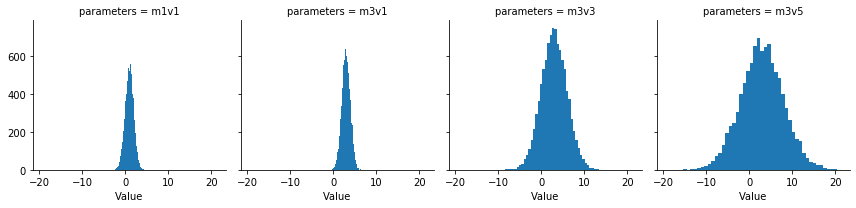

In [72]:
g = sns.FacetGrid(df_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=50,cumulative=False)

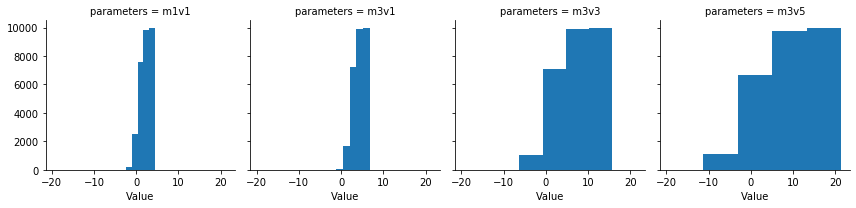

In [73]:
g = sns.FacetGrid(df_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=5,cumulative=True)

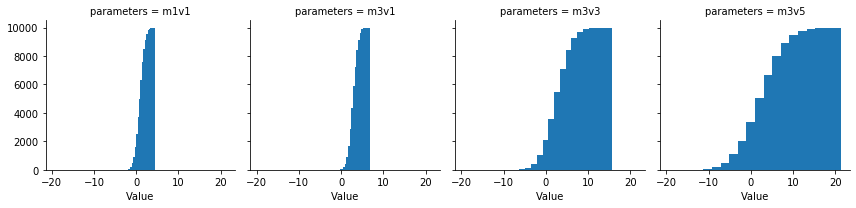

In [74]:
g = sns.FacetGrid(df_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=20,cumulative=True)

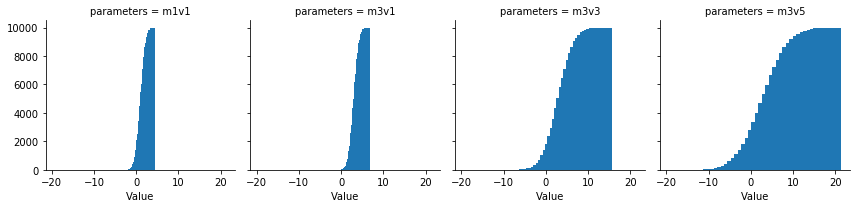

In [75]:
g = sns.FacetGrid(df_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=50,cumulative=True)

In [ ]:
# With higher mean center of normal distribution is in higher value
# Higher variance increases values range of normal distribution

# When cumulative parameter is True, then a histogram is computed 
# where each bin gives the counts in that bin plus all bins for smaller values.
# The last bin gives the total number of datapoints.

# With higher amount of bins plot is more precise, we can obtain more information from it

# Small number of bins would make normal distribution weakly informative
# and large number of bins would make it informative
# Also (I don't know if it is the point of a question) data with higher variance (standard deviation)
# gives higher value range, so we van tell that it is more informative that way

In [68]:
#2. Inverse logit.

In [77]:
from scipy.special import logit, expit

# The expit function, also known as the logistic sigmoid function,
# is defined as expit(x) = 1/(1+exp(-x)).
# It is the inverse of the logit function.

# It can be used for xE(-20, 20) to properly transform data 
# preferably xE(-5, 5) or even xE(-2.5, 2.5) (my opinion)

df2 = expit(df)
df2_melt = pd.melt(df2,var_name='parameters',value_name='Value')

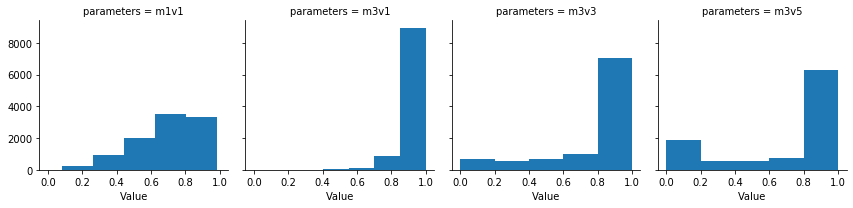

In [78]:
g = sns.FacetGrid(df2_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=5,cumulative=False)

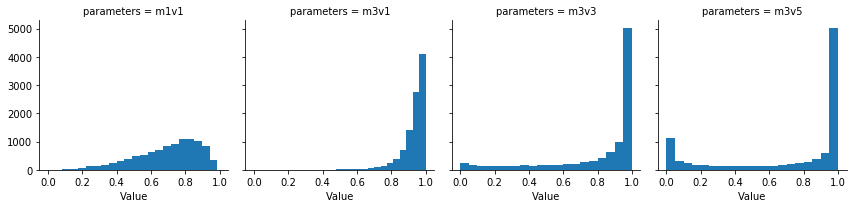

In [79]:
g = sns.FacetGrid(df2_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=20,cumulative=False)

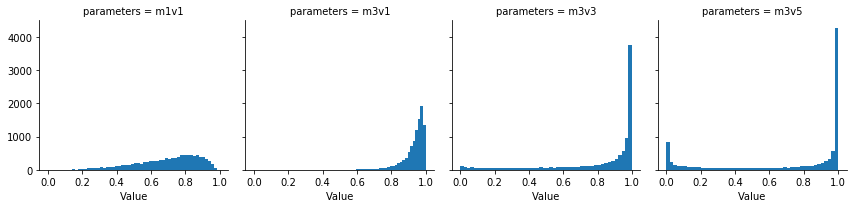

In [80]:
g = sns.FacetGrid(df2_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=50,cumulative=False)

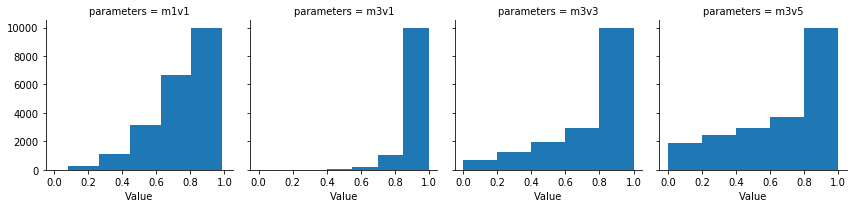

In [81]:
g = sns.FacetGrid(df2_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=5,cumulative=True)

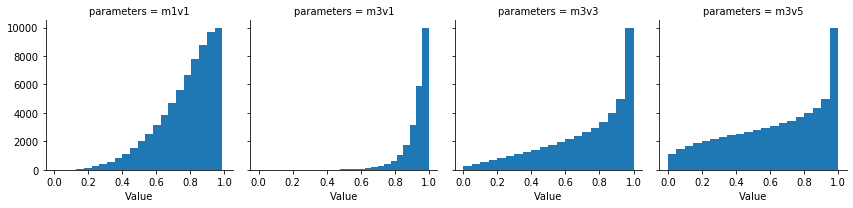

In [82]:
g = sns.FacetGrid(df2_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=20,cumulative=True)

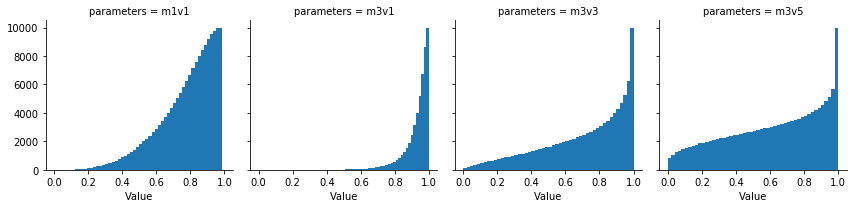

In [83]:
g = sns.FacetGrid(df2_melt,col="parameters",sharex=True)
g.map(plt.hist,'Value',bins=50,cumulative=True)

In [ ]:
# inverse logit can give us additional information about normal distribution
# where on the X axis most of results are
# but in my opinion its not much more informative than without it

In [84]:
# 3. Poisson distribution.

In [95]:
# 'lam' - Expectation of interval, should be >= 0.
# A sequence of expectation intervals must be broadcastable over the requested size.

samples3 = {
    "l1":np.random.poisson(lam=1,size=10000),
    "l3":np.random.poisson(lam=3,size=10000),
    "l5":np.random.poisson(lam=5,size=10000),
    "l7":np.random.poisson(lam=7,size=10000)
}

print(samples3)

df3 = pd.DataFrame(data=samples3)
df3_melt = pd.melt(df3,var_name='parameters',value_name='Value')

{'l1': array([1, 0, 2, ..., 0, 1, 1]), 'l3': array([2, 1, 0, ..., 2, 2, 0]), 'l5': array([3, 6, 5, ..., 3, 3, 5]), 'l7': array([9, 4, 9, ..., 6, 8, 7])}


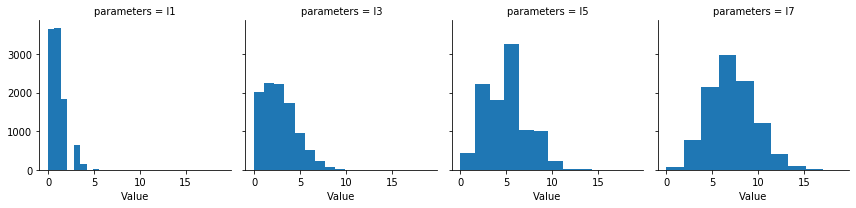

In [96]:
g3 = sns.FacetGrid(df3_melt,col="parameters",sharex=True)
g3.map(plt.hist,'Value')

In [ ]:
# "Observe how mean and variance influence the shape."
# There is no mean and variance parameter in poisson distribution

# We can observe how distribution behaves with different expected rate of intervals (occurrences?)
# With higher expected rate of intervals center of this distribution is at higher value
# and distribution is more 'flat'

In [97]:
# 4. Beta distribution.

In [101]:
# 'a' - alpha
# 'b' - beta

# natural parametrization?
samples4 = {
    "a1b1":np.random.beta(a=1,b=1,size=10000),
    "a5b1":np.random.beta(a=5,b=1,size=10000),
    "a1b5":np.random.beta(a=1,b=5,size=10000),
    "a5b5":np.random.beta(a=5,b=5,size=10000)
}

print(samples4)

df4 = pd.DataFrame(data=samples4)
df4_melt = pd.melt(df4,var_name='parameters',value_name='Value')

{'a1b1': array([0.72705126, 0.69873548, 0.11080205, ..., 0.29417298, 0.81630543,
       0.61510839]), 'a5b1': array([0.65669308, 0.8780879 , 0.53221572, ..., 0.82401115, 0.65900926,
       0.96950971]), 'a1b5': array([0.32694135, 0.25205932, 0.01370718, ..., 0.14487653, 0.13610833,
       0.16554086]), 'a5b5': array([0.42402247, 0.70760485, 0.70836753, ..., 0.32638687, 0.5404983 ,
       0.41155581])}


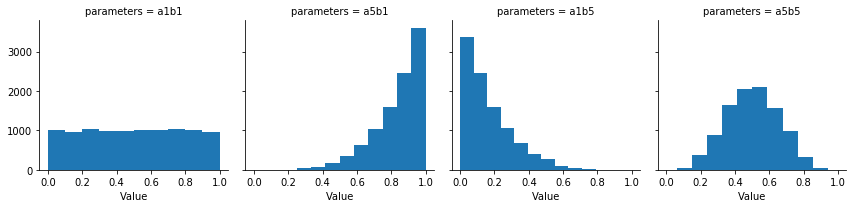

In [102]:
g4 = sns.FacetGrid(df4_melt,col="parameters",sharex=True)
g4.map(plt.hist,'Value')

In [ ]:
# alpha larger - data distributed towards 1
# beta larger - data distributed towards 0
# both higher values - distributed towards center

In [ ]:
# Location dispersion parametrization
# alpha = mean*var, var < mean*(1-mean)
# beta = var*(1-mean), var < mean*(1-mean)

In [22]:
mean = 0.5
var = 0.2

var < mean*(1-mean)

True

In [23]:
alpha = mean*var
beta = var*(1-mean)
print(alpha)
print(beta)

0.1
0.1


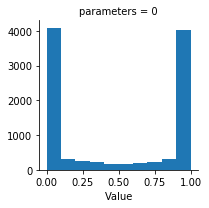

In [15]:
df4 = pd.DataFrame(np.random.beta(a=alpha,b=beta,size=10000))
df4_melt = pd.melt(df4,var_name='parameters',value_name='Value')

g4 = sns.FacetGrid(df4_melt,col="parameters",sharex=True)
g4.map(plt.hist,'Value')

In [ ]:
# With location dispersion parametrization we get U shape distribution

In [ ]:
# Mean-population size parametrization
# alpha = mean*var,
# beta = var*(1-mean),

3.6
0.3999999999999999


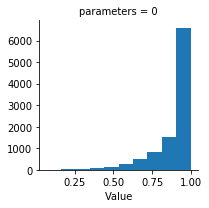

In [24]:
mean = 0.9
var = 4
alpha = mean*var
beta = var*(1-mean)
print(alpha)
print(beta)
df4 = pd.DataFrame(np.random.beta(a=alpha,b=beta,size=10000))
df4_melt = pd.melt(df4,var_name='parameters',value_name='Value')

g4 = sns.FacetGrid(df4_melt,col="parameters",sharex=True)
g4.map(plt.hist,'Value')

In [ ]:
# it behaves like with natural parametrization

In [103]:
# 5. Log-normal distribution

In [41]:
# 'mean' - mean
# 'sigma' - standard deviation (the square root of the variance)

samples5 = {
    "m0s1_default":np.random.lognormal(mean=0,sigma=1,size=10000),
    "m1s1":np.random.lognormal(mean=1,sigma=1,size=10000),
    "m3s1":np.random.lognormal(mean=3,sigma=1,size=10000),
    "m1s3":np.random.lognormal(mean=1,sigma=3,size=10000),
    "m5s5":np.random.lognormal(mean=5,sigma=5,size=10000)
}

df5 = pd.DataFrame(data=samples5)
df5_melt = pd.melt(df5,var_name='parameters',value_name='Value')

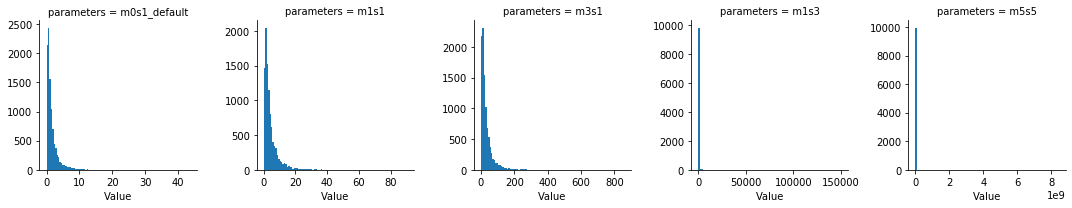

In [42]:
g5 = sns.FacetGrid(df5_melt,col="parameters",sharex=False,sharey=False)
g5.map(plt.hist,'Value',bins=100)

In [ ]:
# variance > 1 destroys distribution
# higher mean results in wider range of values (x axis)

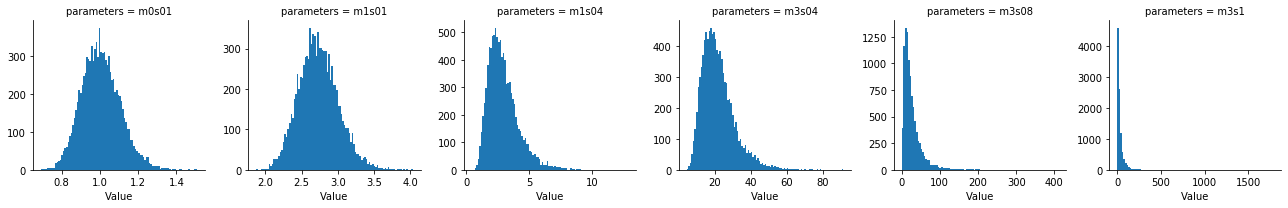

In [43]:
samples5 = {
    "m0s01":np.random.lognormal(mean=0,sigma=0.1,size=10000),
    "m1s01":np.random.lognormal(mean=1,sigma=0.1,size=10000),
    "m1s04":np.random.lognormal(mean=1,sigma=0.4,size=10000),
    "m3s04":np.random.lognormal(mean=3,sigma=0.4,size=10000),
    "m3s08":np.random.lognormal(mean=3,sigma=0.8,size=10000),
    "m3s1":np.random.lognormal(mean=3,sigma=1,size=10000)
}

df5 = pd.DataFrame(data=samples5)
df5_melt = pd.melt(df5,var_name='parameters',value_name='Value')

g5 = sns.FacetGrid(df5_melt,col="parameters",sharex=False,sharey=False)
g5.map(plt.hist,'Value',bins=100)

In [ ]:
# The lower variance the more closer to each other values of distribution are
# They are more 'packed'

In [45]:
samples5 = {
    "m01s01":np.random.lognormal(mean=0.1,sigma=0.1,size=10000),
    "m03s01":np.random.lognormal(mean=0.3,sigma=0.1,size=10000),
    "m01s03":np.random.lognormal(mean=0.1,sigma=0.3,size=10000),
    "m05s05":np.random.lognormal(mean=0.5,sigma=0.5,size=10000)

}

df5 = pd.DataFrame(data=samples5)
df5_melt = pd.melt(df5,var_name='parameters',value_name='Value')

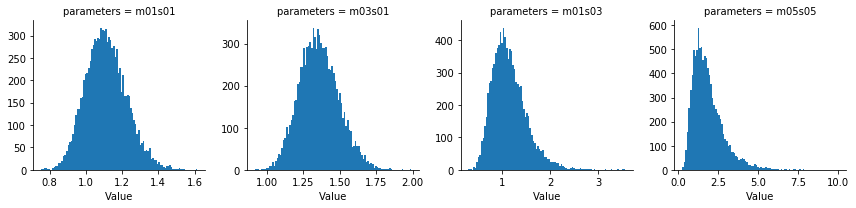

In [46]:
g5 = sns.FacetGrid(df5_melt,col="parameters",sharex=False,sharey=False)
g5.map(plt.hist,'Value',bins=100)

In [ ]:
# These results confirm previous conclusions